In [6]:
import sys
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/')
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/pycolmap')
from dataset import NerfDatasetRealImages, BlenderDataset


KeyboardInterrupt: 

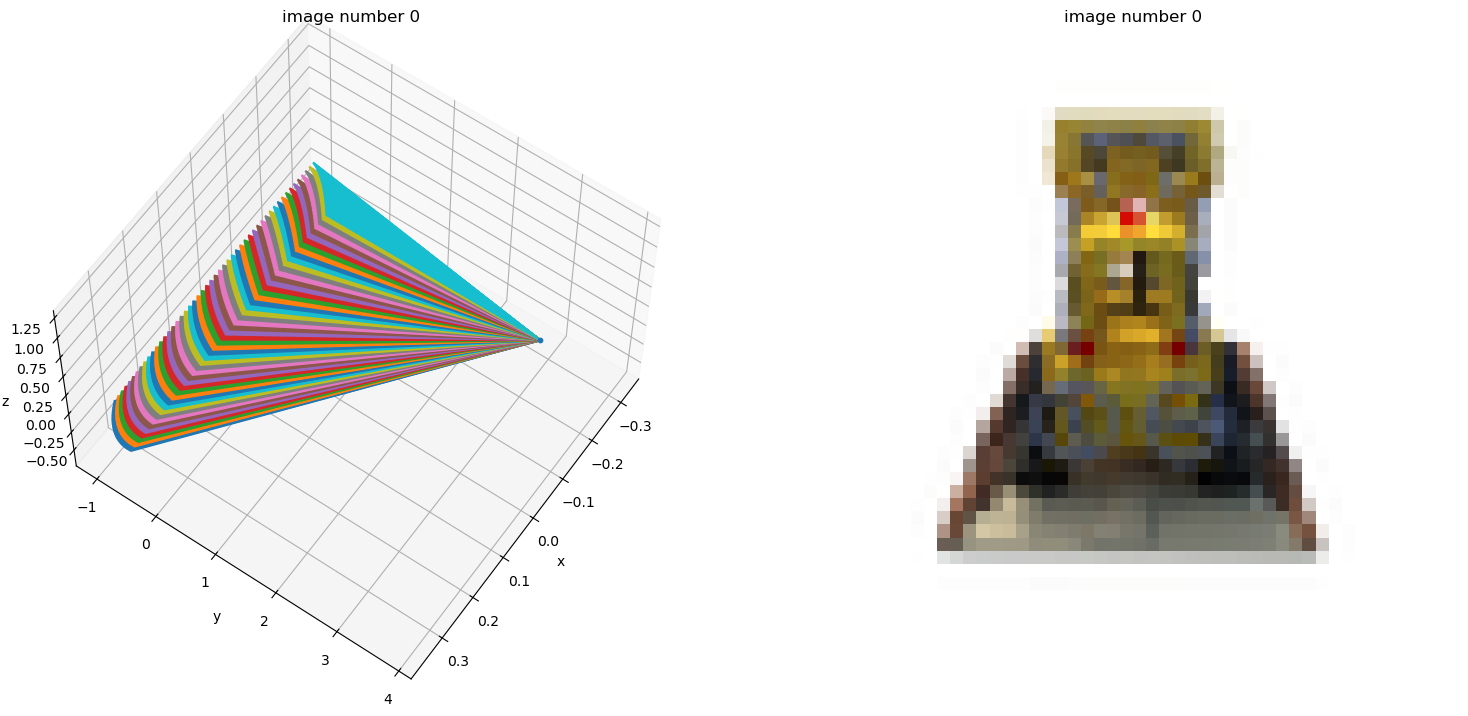

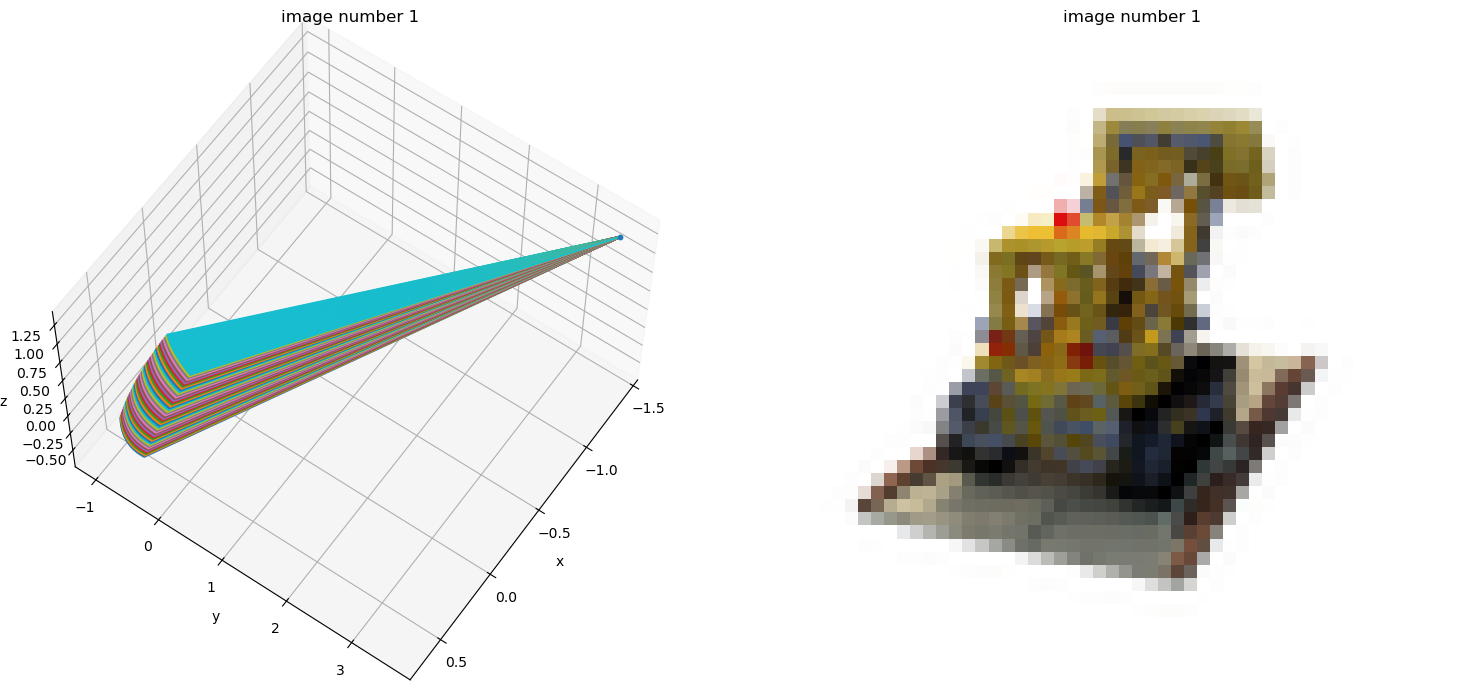

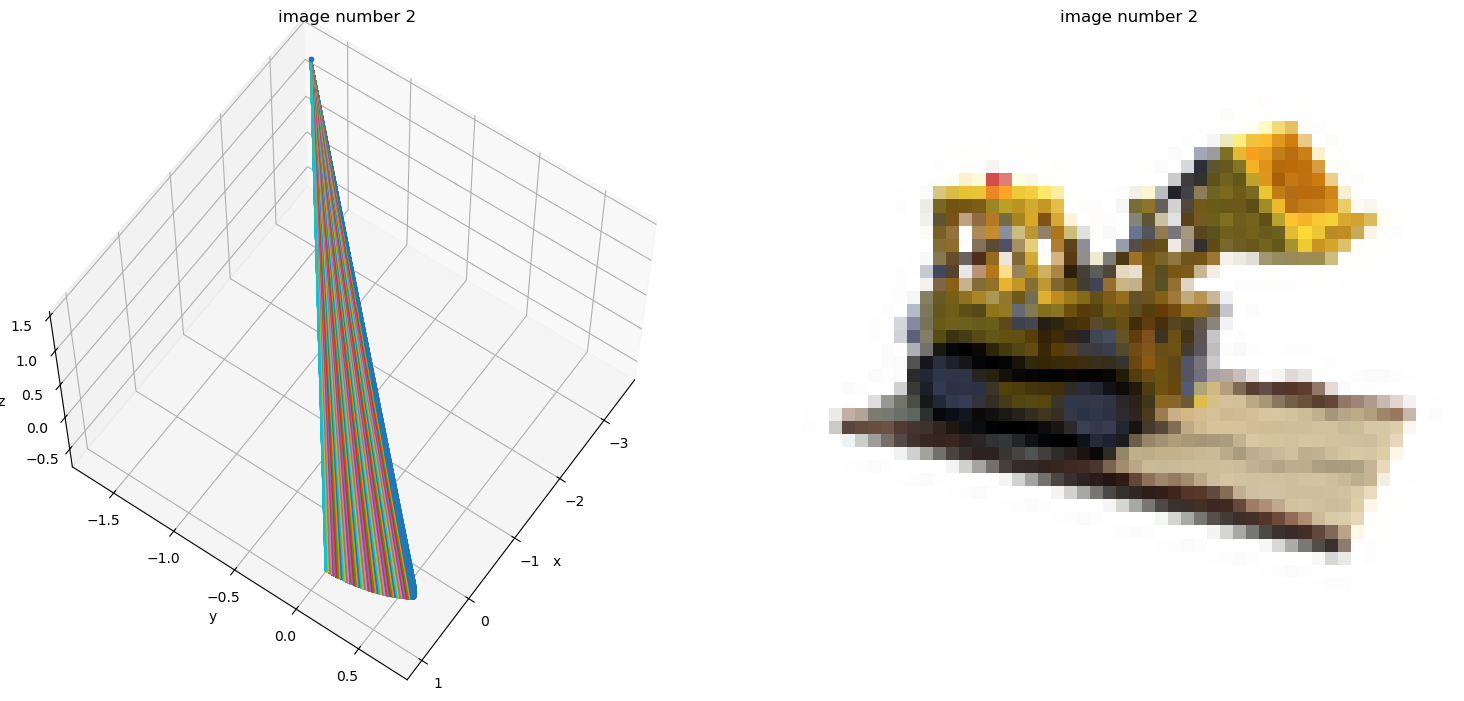

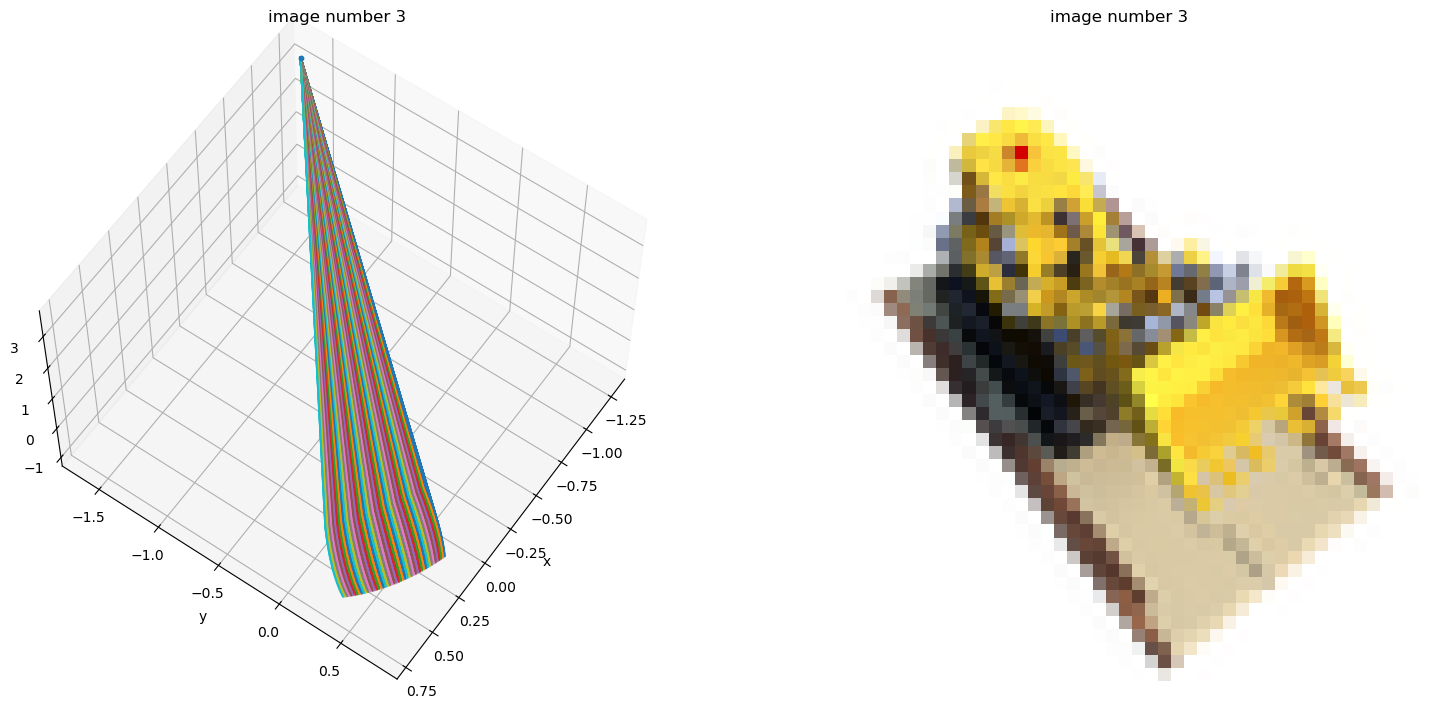

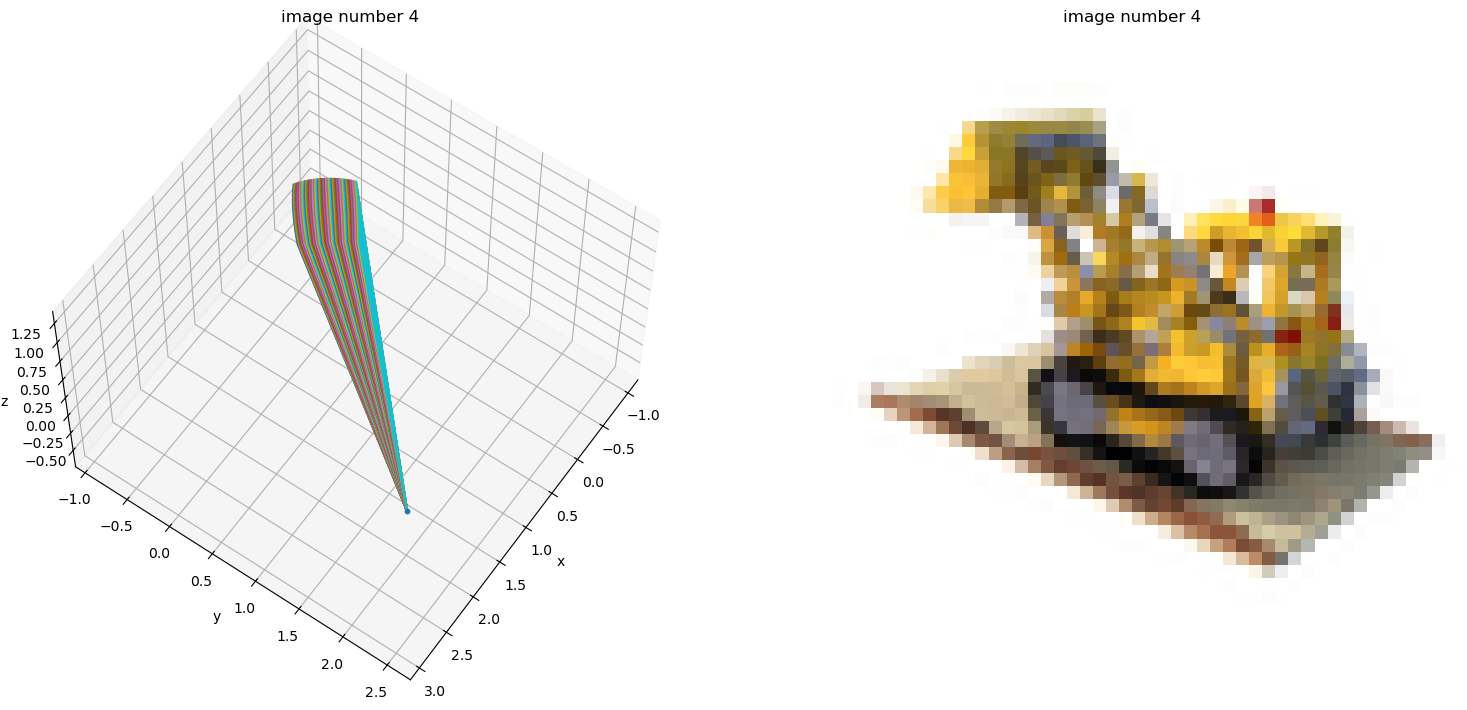

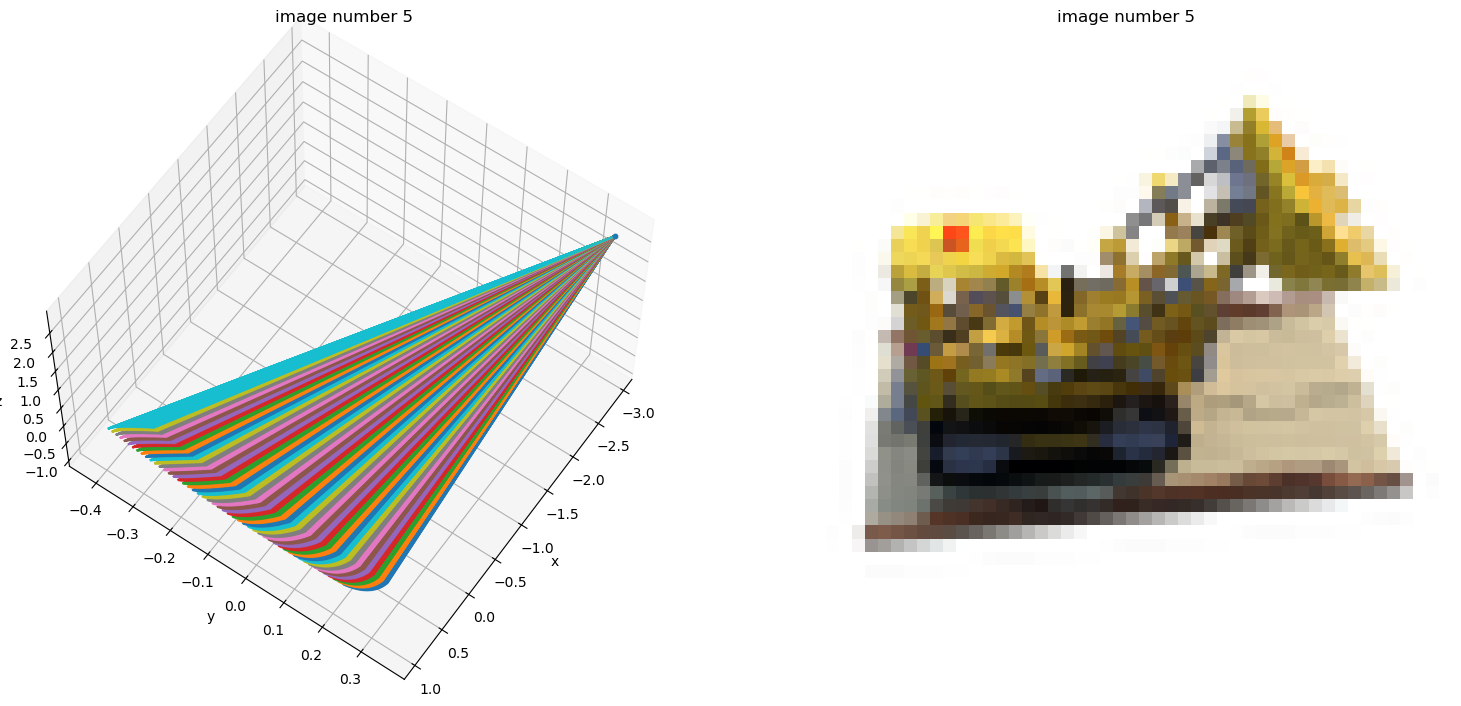

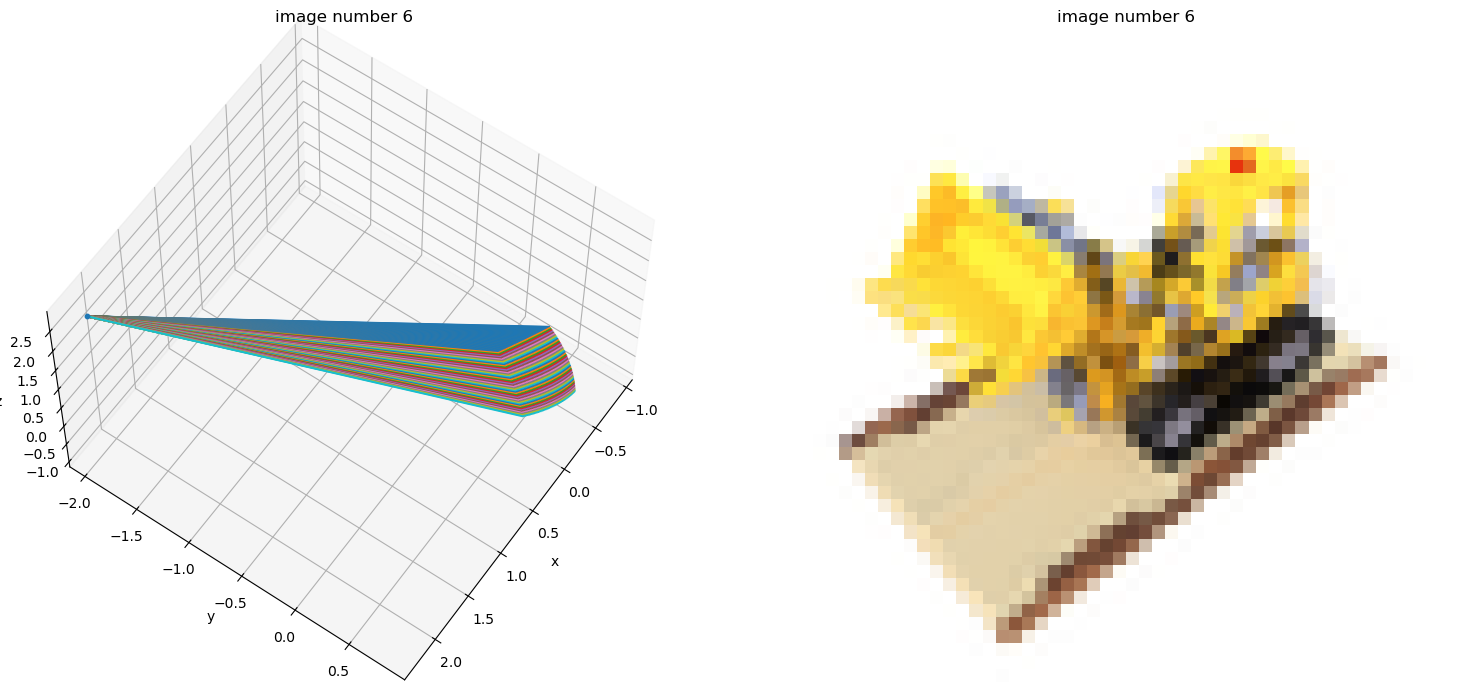

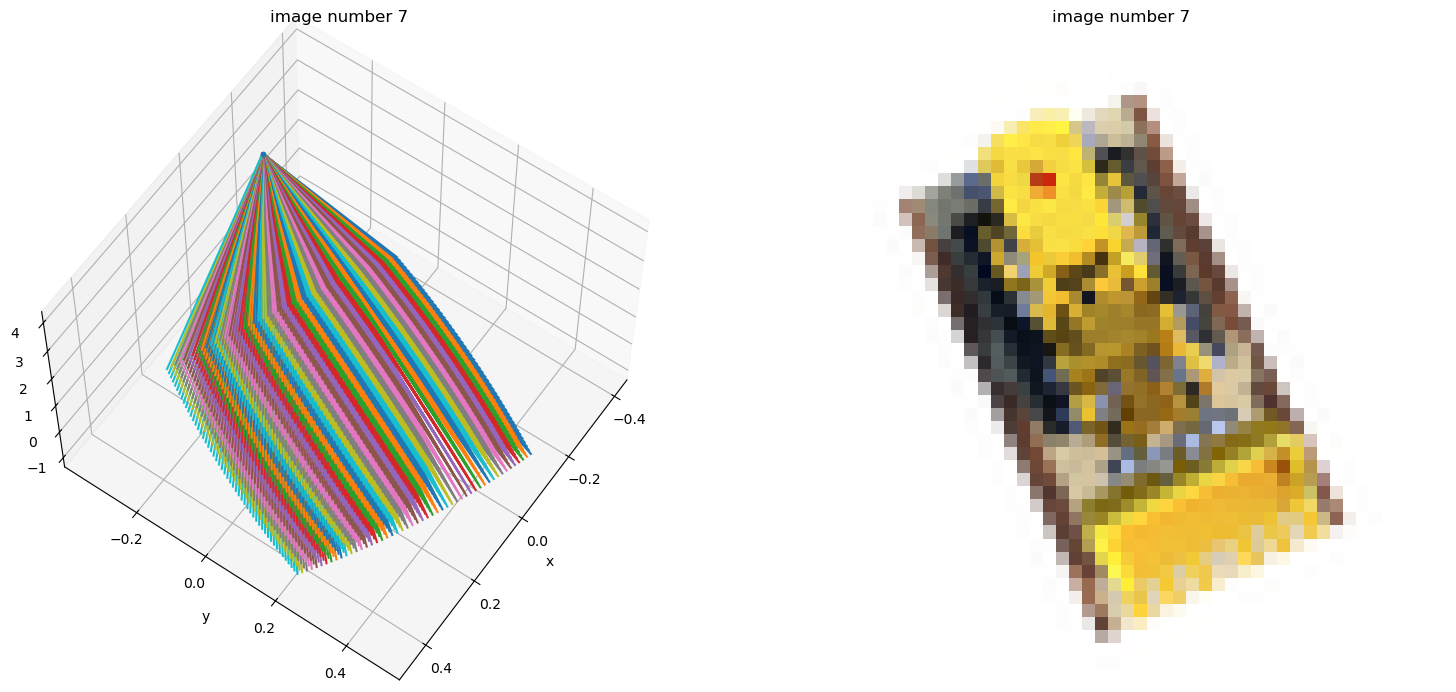

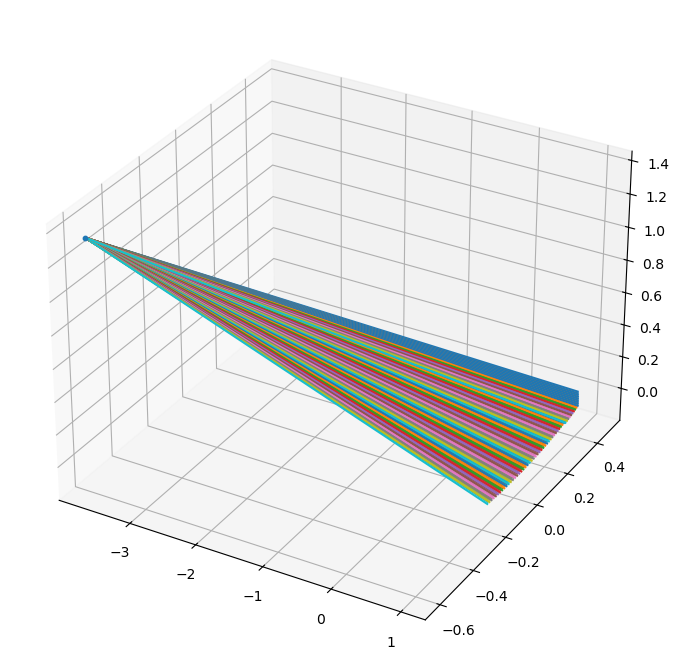

In [7]:
# blender
import matplotlib.pyplot as plt
img_res = 50

nerf_dataset = BlenderDataset(root_dir="/home/kolek/Edu/project/nerf_synthetic/lego", split="train", img_wh=(img_res, img_res))

for img_no in range(20):

    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax = fig.add_subplot(121, projection='3d')

    one_image = nerf_dataset[img_res * img_res * img_no : img_res  * img_res * (img_no + 1)]
    origins = one_image['rays'][...,0:3][0]
    directions = one_image['rays'][...,3:6]

    o_x, o_y, o_z = origins
    ax.scatter(o_x, o_y, o_z, label="origin", s=10)

    for ray_dir in directions:
        d_x, d_y, d_z = ray_dir
        ax.plot([o_x, d_x], [o_y, d_y], [o_z, d_z])
    plt.title(f"image number {img_no}")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(60, 35)
    ax = fig.add_subplot(122)
    ax.imshow(one_image['rgbs'].reshape(img_res, img_res, 3))
    plt.axis("off")
    plt.title(f"image number {img_no}")


Reconstruction 0 chosen
Scaled image resolution: [80, 60]
torch.Size([4800, 3])


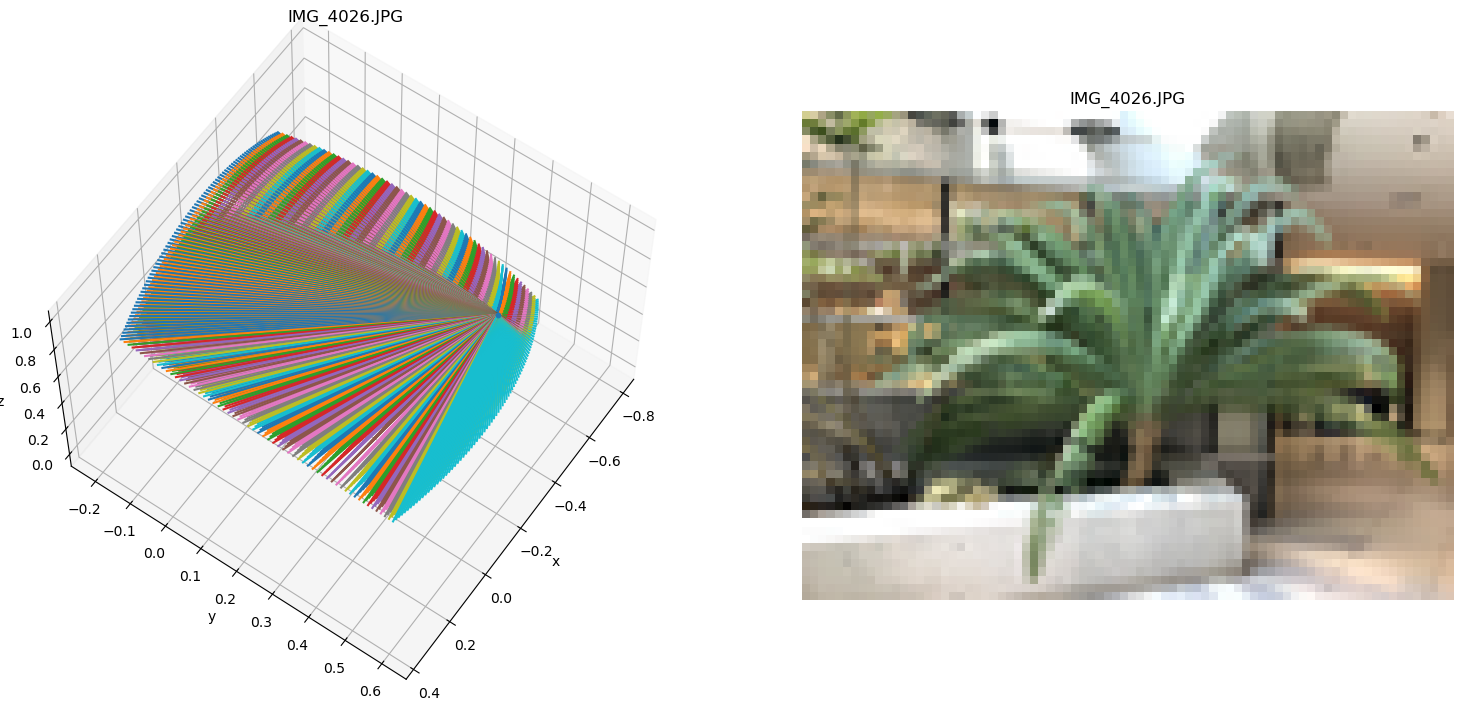

In [ ]:
import sys
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/')
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/pycolmap')
from dataset import NerfDatasetRealImages, BlenderDataset
# real
from torchvision import transforms
import matplotlib.pyplot as plt

nerf_dataset = NerfDatasetRealImages(data_path="/home/kolek/Edu/project/nerf_llff_data/fern", split="val", downscale_factor=50.)

counter = 0

to_pil_image = transforms.ToPILImage()
for elem in nerf_dataset:
    if counter == 1:
        break
    
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax = fig.add_subplot(121, projection='3d')
    ray_directions = elem['ray_directions']
    ray_origins = elem['ray_origins']
    o_x, o_y, o_z = ray_origins[0]
    ax.scatter(o_x, o_y, o_z, label="origin", s=10)
    for ray_dir in ray_directions:
        d_x, d_y, d_z = ray_dir
        ax.plot([o_x, d_x], [o_y, d_y], [o_z, d_z])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(60, 35)
    plt.title(elem['image_name'])
    ax = fig.add_subplot(122)
    rgb = elem['rgb'].reshape(nerf_dataset.image_resolution[1], nerf_dataset.image_resolution[0], 3)
    ax.imshow(rgb)
    plt.axis("off")
    plt.title(elem['image_name'])
    counter += 1

Reconstruction 0 chosen
Scaled image resolution: [160, 160]


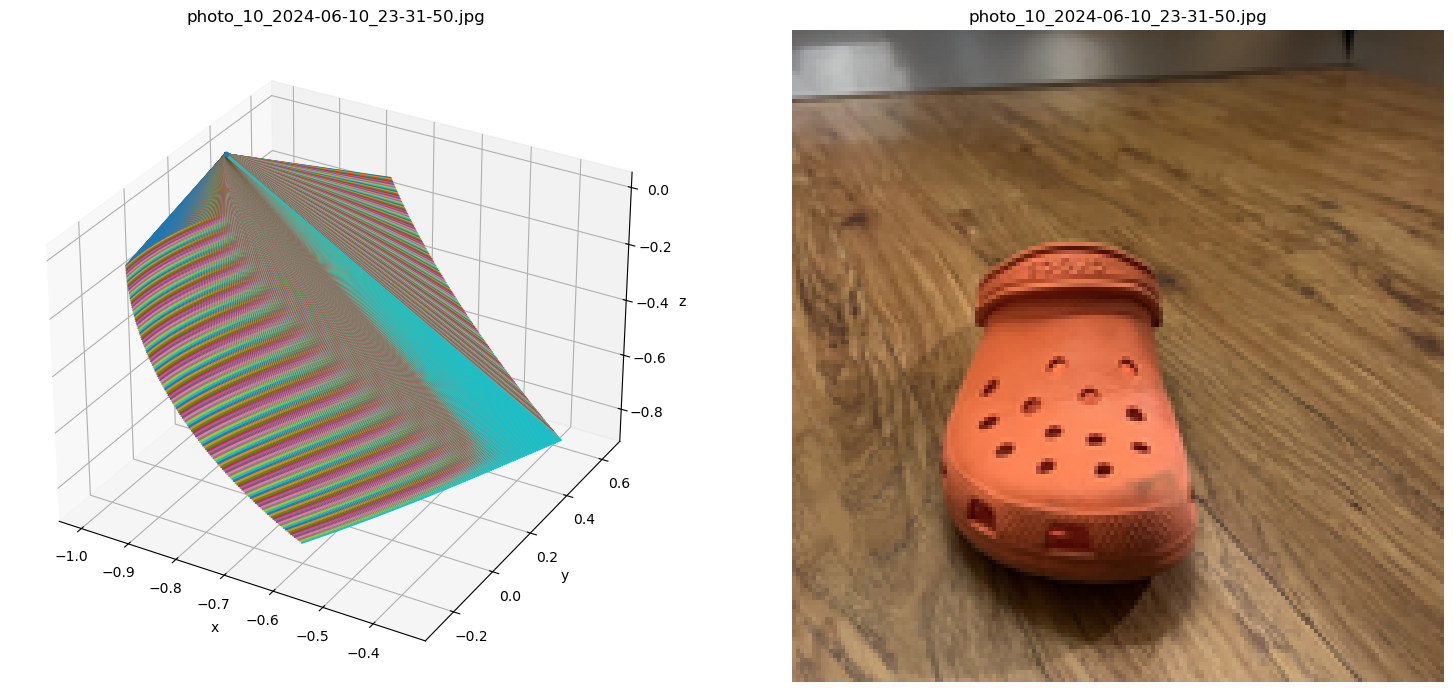

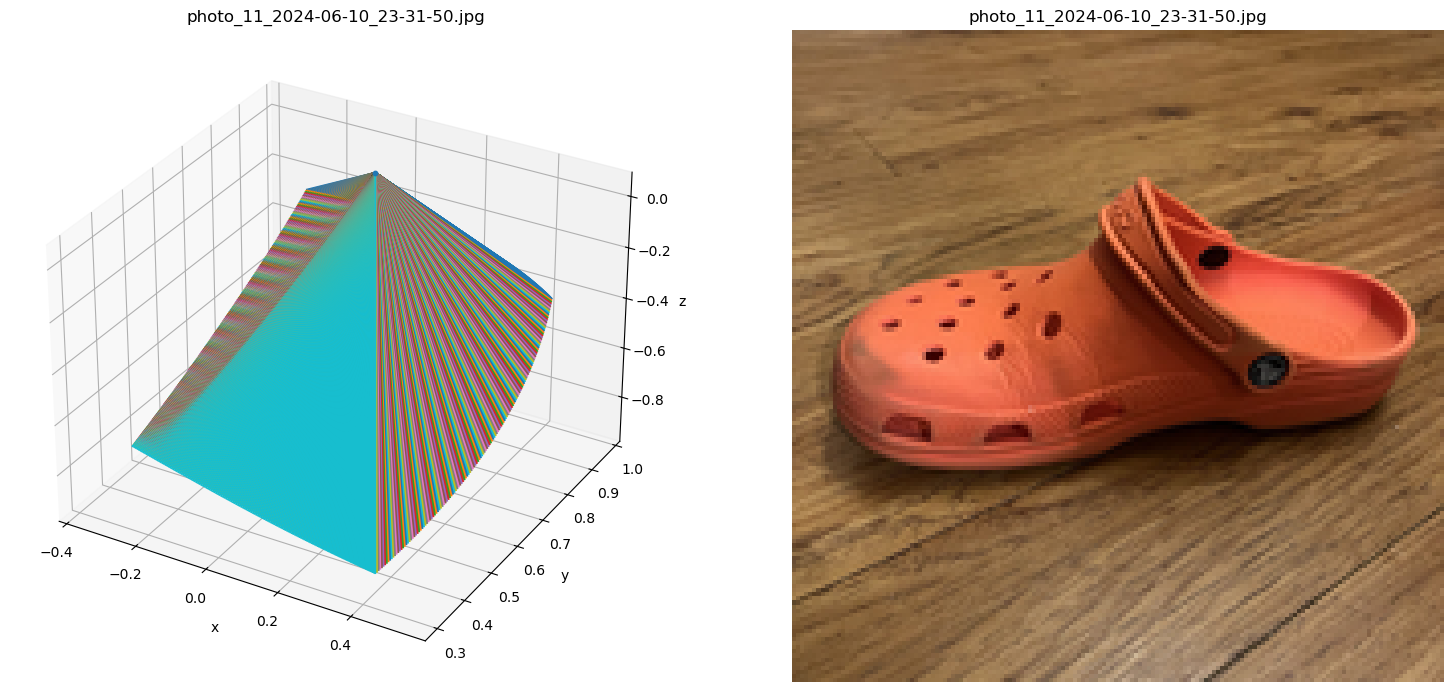

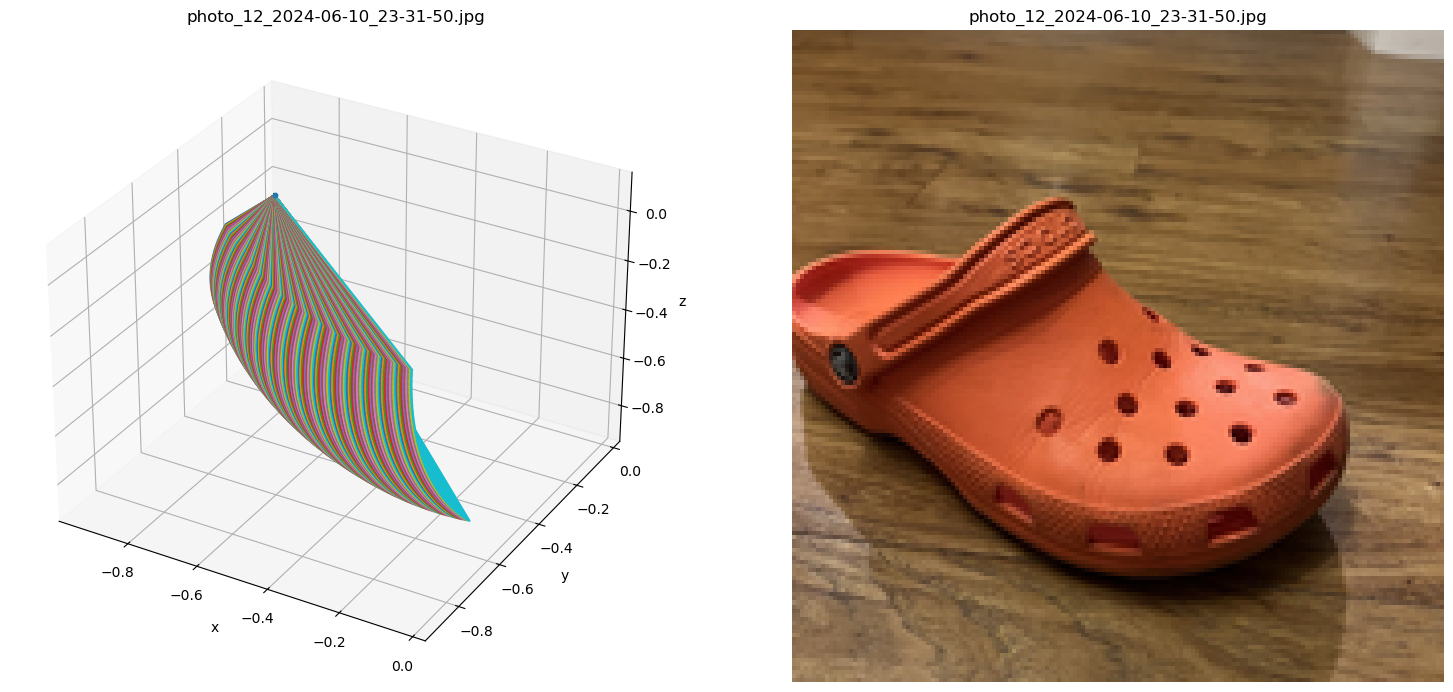

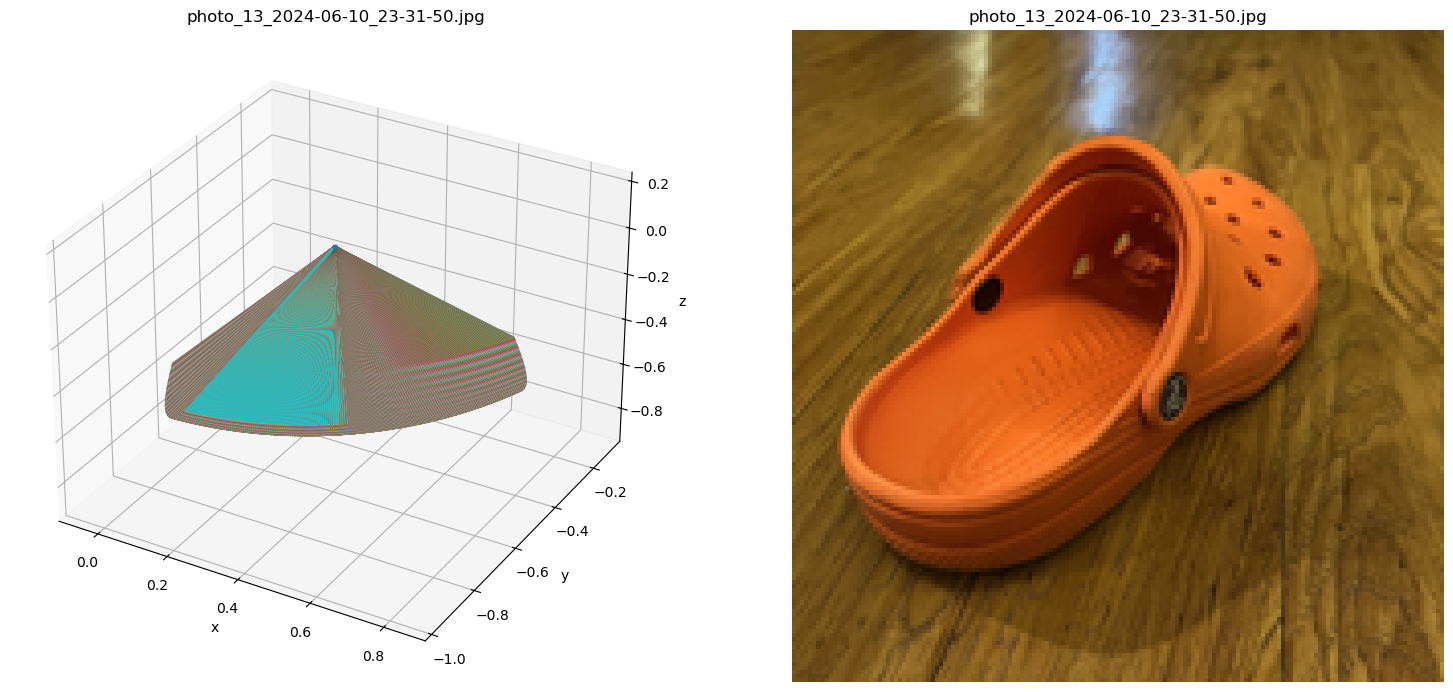

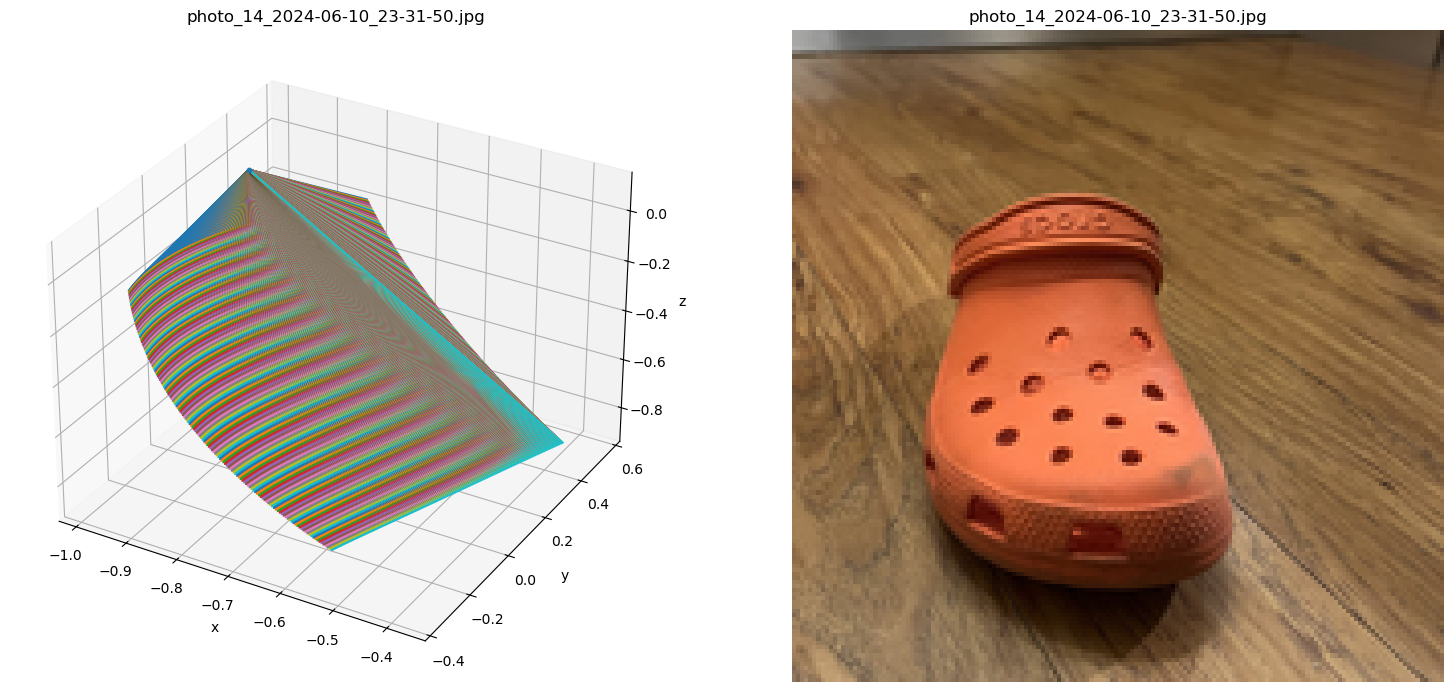

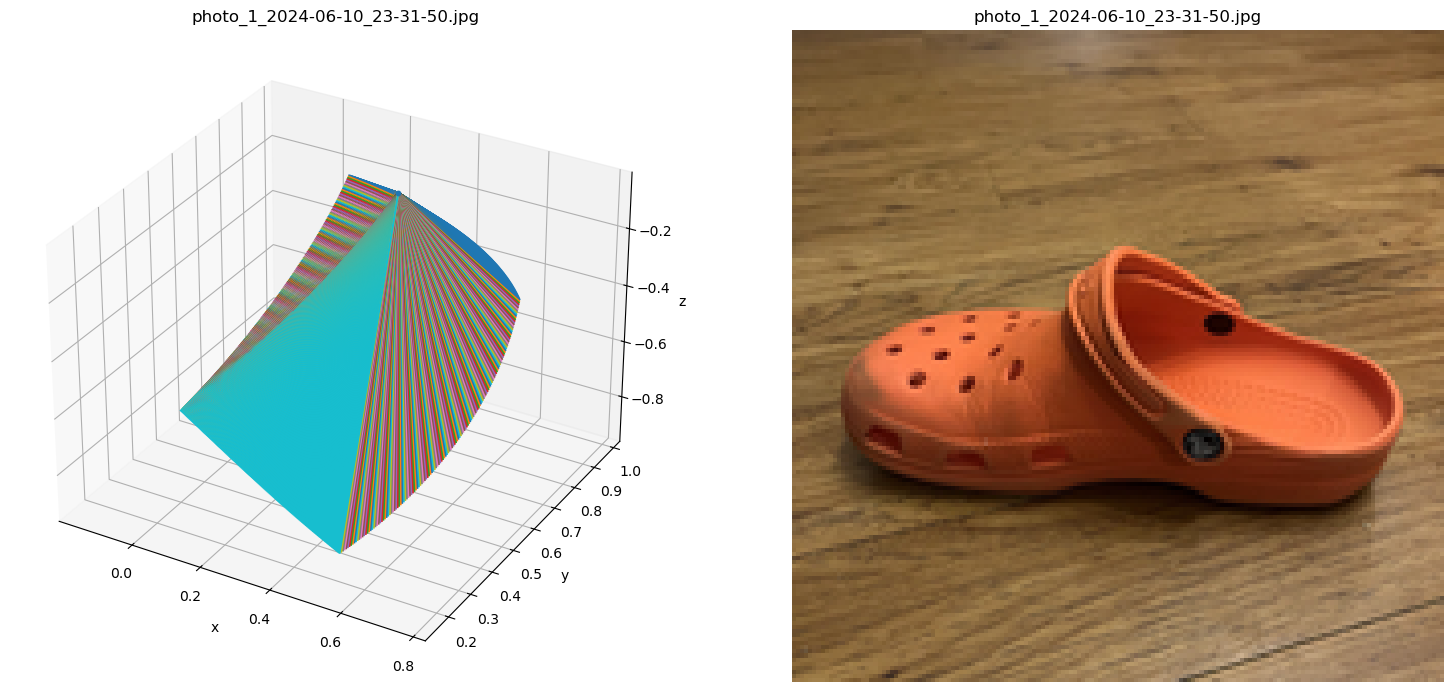

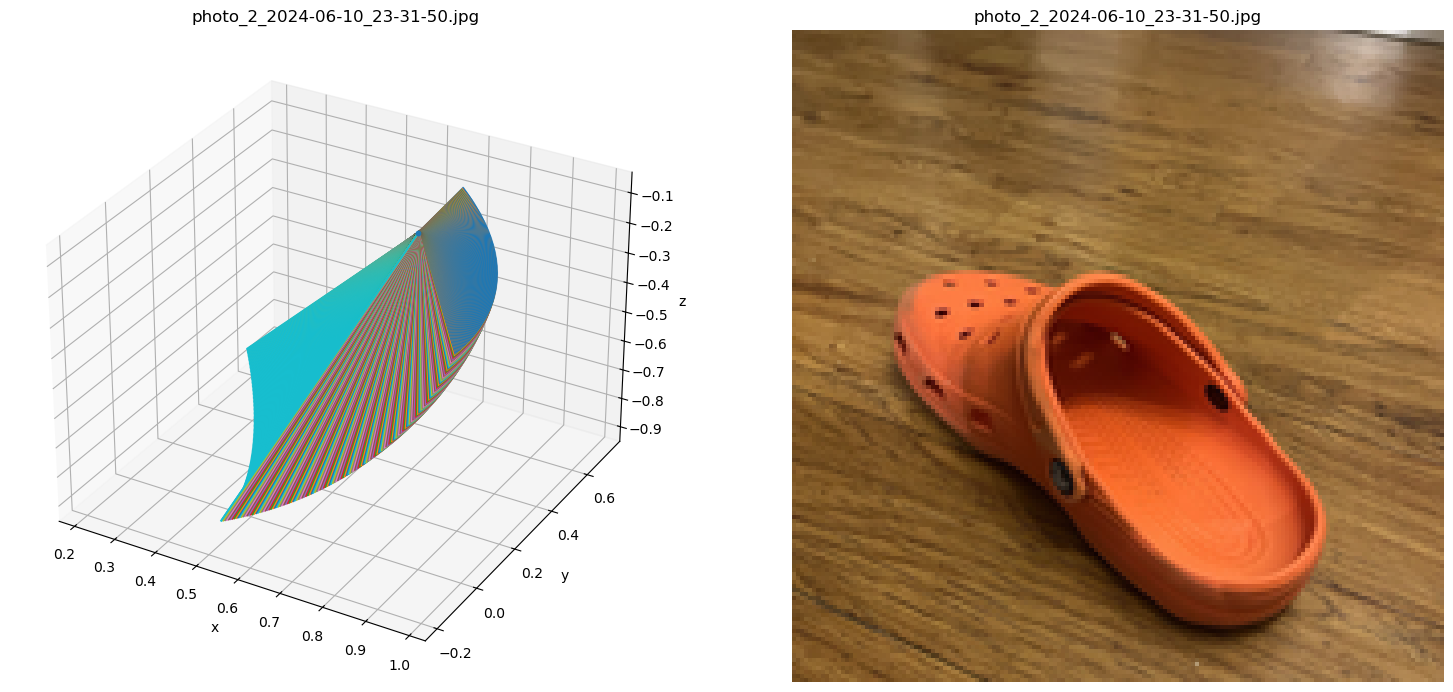

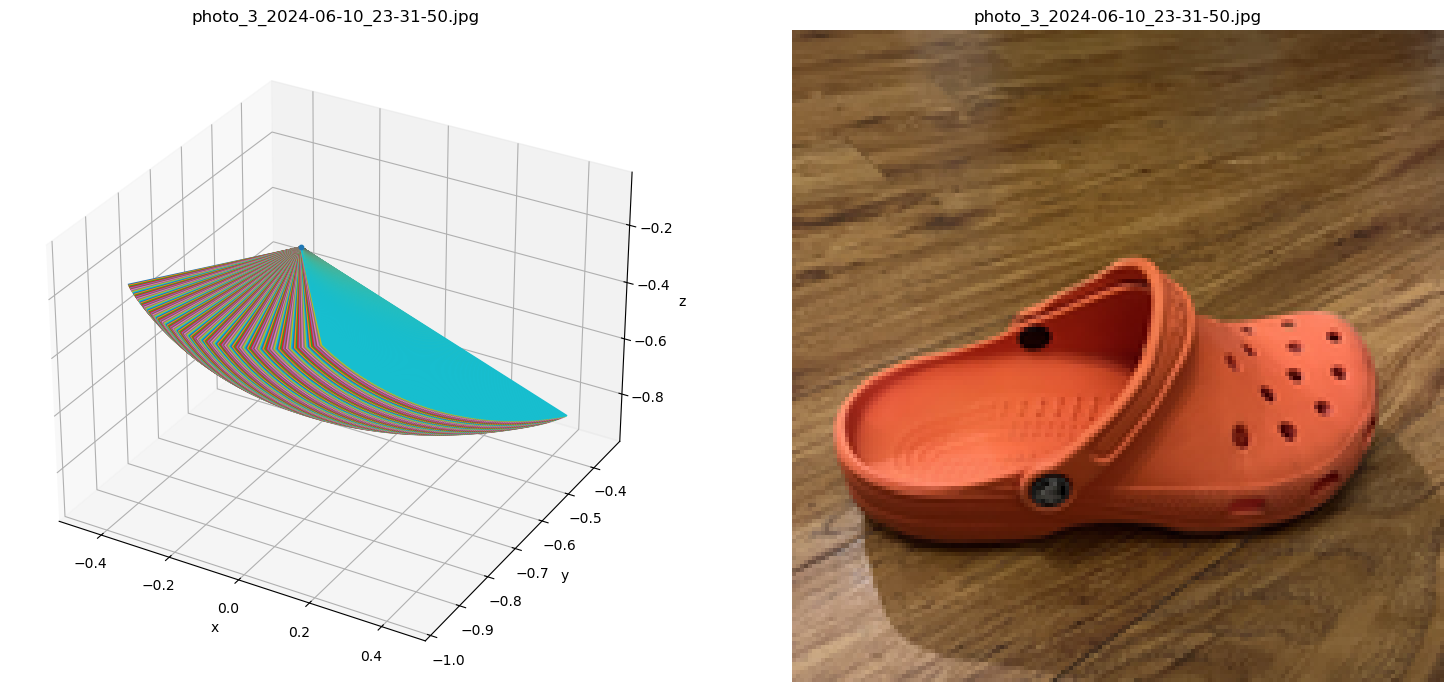

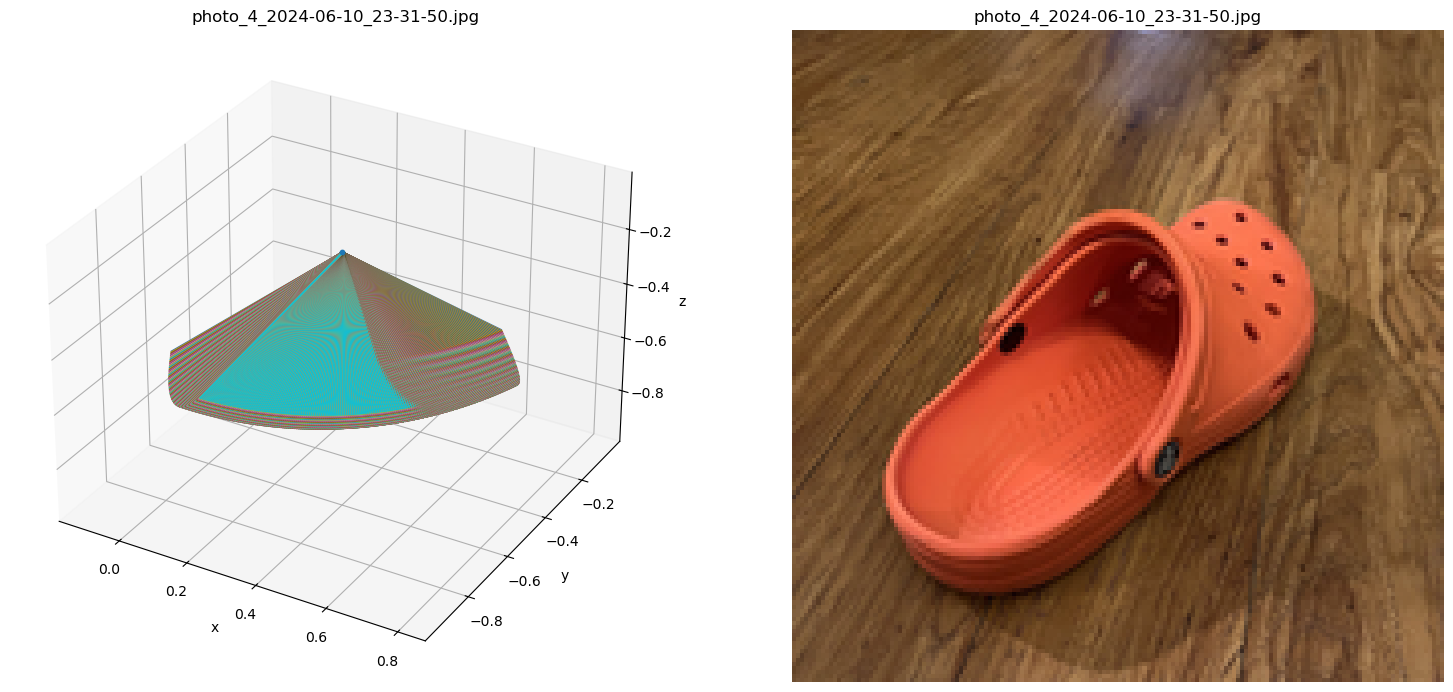

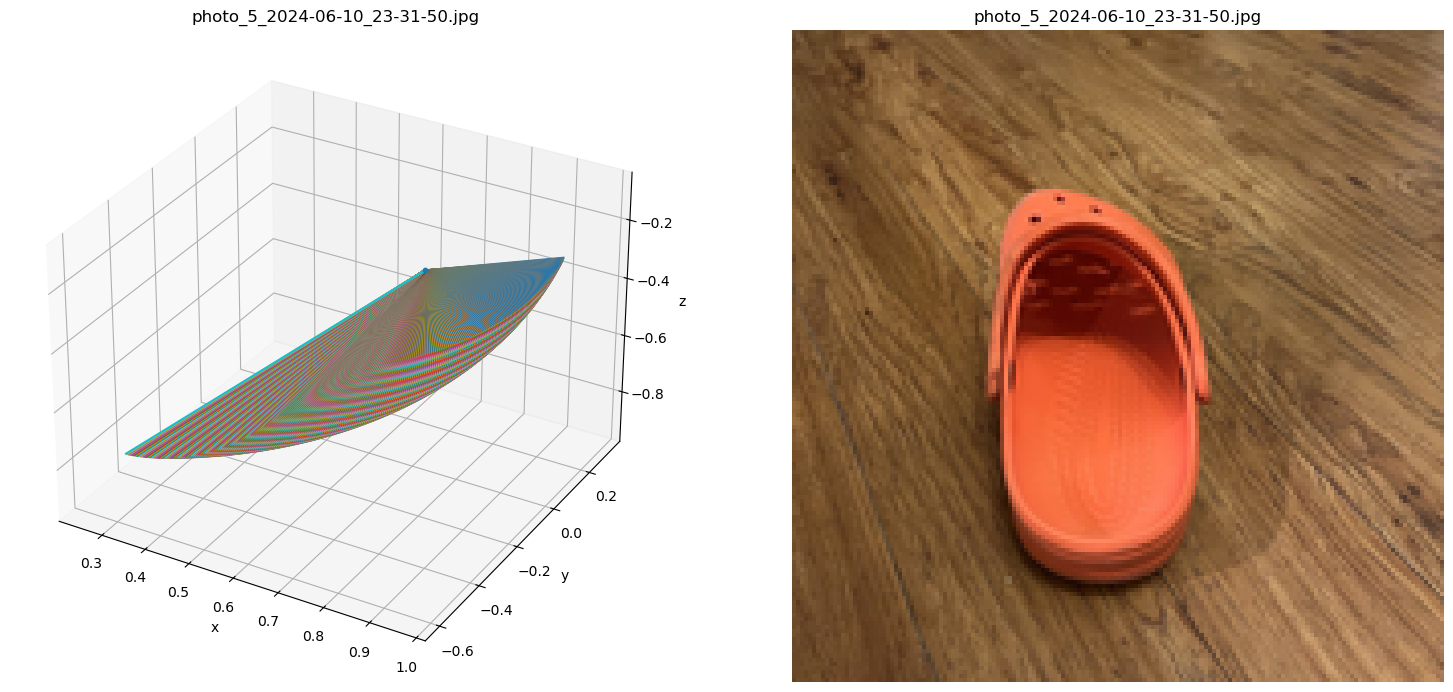

In [ ]:
import sys
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/')
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/pycolmap')
from dataset import NerfDatasetRealImages, BlenderDataset
# real
from torchvision import transforms
import matplotlib.pyplot as plt

nerf_dataset = NerfDatasetRealImages(data_path="/home/kolek/Edu/project/nerf_crocs3", downscale_factor=8.)

counter = 0

to_pil_image = transforms.ToPILImage()
for elem in nerf_dataset:
    if counter == 10:
        break
    
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax = fig.add_subplot(121, projection='3d')
    ray_directions = elem['ray_directions']
    ray_origins = elem['ray_origins']
    o_x, o_y, o_z = ray_origins[0]
    ax.scatter(o_x, o_y, o_z, label="origin", s=10)
    for ray_dir in ray_directions:
        d_x, d_y, d_z = ray_dir
        ax.plot([o_x, d_x], [o_y, d_y], [o_z, d_z])
        #ax.scatter(d_x, d_y, d_z)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    #ax.view_init(60, 35)
    plt.title(elem['image_name'])
    ax = fig.add_subplot(122)
    rgb = elem['rgb'].reshape(nerf_dataset.image_resolution[1], nerf_dataset.image_resolution[0], 3)
    ax.imshow(rgb)
    plt.axis("off")
    plt.title(elem['image_name'])
    counter += 1

In [1]:
import sys
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/')
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/pycolmap')
import nerf_system

config = {
    'input_size_ray': 3,
    'input_size_direction': 3,
    'n_ray_samples': 12,
    'downscale_factor': 7.,
    'batch_size': 150 * 150,
    'use_positional_encoding': True,
    'use_hierarchical_sampling': False,
    #'dataset_type': 'real',
    #'train_dataloader_path': '/home/kolek/Edu/project/coffee_nerf/',
    "dataset_type": "blender",
    "train_dataset_path": "/home/kolek/Edu/project/nerf_synthetic/lego",
}

nerfsys = nerf_system.NerfSystem(**config)

/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
import lightning as L
epochs = 20
trainer = L.Trainer(
    max_epochs=epochs,
    accelerator="auto",
    enable_model_summary=True,
    enable_progress_bar=True,
    #num_sanity_val_steps=1,
    #check_val_every_n_epoch=1,
    benchmark=False,
    profiler=None,
    log_every_n_steps=24
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


In [3]:
trainer.fit(nerfsys)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                             | Type                        | Params
---------------------------------------------------------------------------------
0 | ray_sampler_in_linear_disparity  | RaySamplerLinearInDisparity | 0     
1 | ray_sampler_pdf                  | RaySamplerPDF               | 0     
2 | volume_renderer                  | VolumeRenderer              | 0     
3 | loss                             | MSELoss                     | 0     
4 | positional_encoder_ray_direction | PositionalEncoder           | 0     
5 | positional_encoder_ray_points    | PositionalEncoder           | 0     
6 | coarse_model                     | NerfModel                   | 530 K 
---------------------------------------------------------------------------------
530 K     Trainable params
0         Non-trainable params
530 K     Total params
2.120     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

ValueError: Floating point image RGB values must be in the 0..1 range.

In [1]:
# training on real data
import sys
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/')
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/pycolmap')
import nerf_system

config = {
    'input_size_ray': 3,
    'input_size_direction': 3,
    'n_ray_samples': 64,
    'downscale_factor': 22.,
    'batch_size': 20,
    'use_positional_encoding': True,
    'use_hierarchical_sampling': False,
    'dataset_type': 'real',
    'train_dataset_path': '/home/kolek/Edu/project/nerf_llff_data/fern',
}

nerfsys = nerf_system.NerfSystem(**config)

/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Model inputs (63, 27)


In [2]:
import lightning as L
epochs = 5000
trainer = L.Trainer(
    max_epochs=epochs,
    accelerator="auto",
    enable_model_summary=True,
    enable_progress_bar=True,
    benchmark=False,
    profiler=None,
    log_every_n_steps=24
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


In [3]:
trainer.fit(nerfsys)

Reconstruction 0 chosen
Scaled image resolution: [183, 137]
Reconstruction 0 chosen
Scaled image resolution: [183, 137]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                             | Type                        | Params
---------------------------------------------------------------------------------
0 | ray_sampler_in_linear_disparity  | RaySamplerLinearInDisparity | 0     
1 | ray_sampler_pdf                  | RaySamplerPDF               | 0     
2 | volume_renderer                  | VolumeRenderer              | 0     
3 | loss                             | MSELoss                     | 0     
4 | positional_encoder_ray_direction | PositionalEncoder           | 0     
5 | positional_encoder_ray_points    | PositionalEncoder           | 0     
6 | coarse_model                     | NerfModel                   | 530 K 
---------------------------------------------------------------------------------
530 K     Trainable params
0         Non-trainable params
530 K     Total params
2.120     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.91 GiB. GPU 0 has a total capacty of 3.81 GiB of which 1.57 GiB is free. Process 309231 has 80.00 MiB memory in use. Including non-PyTorch memory, this process has 2.16 GiB memory in use. Of the allocated memory 2.08 GiB is allocated by PyTorch, and 14.05 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
import sys
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/')
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/pycolmap')
import video2images

video_path = '/home/kolek/Edu/project/IMG_1974.MOV'
images_path = '/home/kolek/Edu/project/nerf_crocs2'
colmap_script = '/home/kolek/Edu/project/video-to-3d/scripts/local_colmap_and_resize.sh'

video_preprocess = video2images.VideoPreprocessor(video_path=video_path,
                                                  images_path=images_path,
                                                  colmap_script_path=colmap_script,
                                                  num_frames=30,
                                                  remove_background=True)

In [1]:
# training on real data
import sys
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/')
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/pycolmap')
import nerf_system

config = {
    'input_size_ray': 3,
    'input_size_direction': 3,
    'n_ray_samples': 12,
    'downscale_factor':6.5,
    'batch_size': 110 * 196,
    'use_positional_encoding': True,
    'use_hierarchical_sampling': False,
    'dataset_type': 'real',
    'train_dataset_path': '/home/kolek/Edu/project/nerf_crocs2',
}

nerfsys = nerf_system.NerfSystem(**config)

/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Model inputs (63, 27)


In [2]:
import lightning as L
epochs = 5000
trainer = L.Trainer(
    max_epochs=epochs,
    accelerator="auto",
    enable_model_summary=True,
    enable_progress_bar=True,
    #num_sanity_val_steps=1,
    #check_val_every_n_epoch=1,
    benchmark=False,
    profiler=None,
    log_every_n_steps=24,
    check_val_every_n_epoch=10,
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


Reconstruction 1 chosen
Scaled image resolution: [110, 196]
Reconstruction 1 chosen
Scaled image resolution: [110, 196]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                             | Type                        | Params
---------------------------------------------------------------------------------
0 | ray_sampler_in_linear_disparity  | RaySamplerLinearInDisparity | 0     
1 | ray_sampler_pdf                  | RaySamplerPDF               | 0     
2 | volume_renderer                  | VolumeRenderer              | 0     
3 | loss                             | MSELoss                     | 0     
4 | positional_encoder_ray_direction | PositionalEncoder           | 0     
5 | positional_encoder_ray_points    | PositionalEncoder           | 0     
6 | coarse_model                     | NerfModel                   | 530 K 
---------------------------------------------------------------------------------
530 K     Trainable params
0         Non-trainable params
530 K     Total params
2.120     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


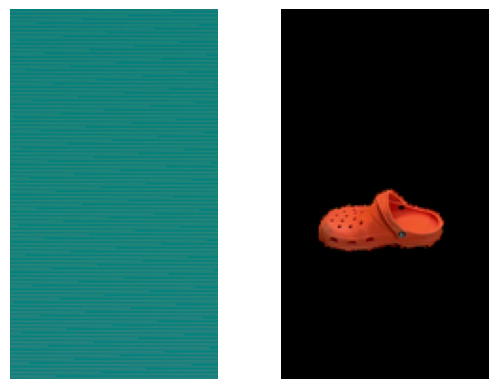

Training: |          | 0/? [00:00<?, ?it/s]

/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [3]:
trainer.fit(nerfsys)